## Some setup

In [1]:
using Logging
using Plots, D4M, StatsBase, Dates, AAUtils, DataFrames
gr()
ENV["LINES"] = 900
ENV["COLUMNS"] = 5500
IJulia.set_max_stdio(1 << 200)
;

### We read in our data

In [2]:
CCD1 = ReadCSV("ccd321.csv")
CCD2 = ReadCSV("ccd322.csv")
CCD3 = ReadCSV("ccd323.csv")
CCD4 = ReadCSV("ccd324.csv")
CCD5 = ReadCSV("ccd325.csv")
CCD = CCD1 + CCD2 + CCD3 +CCD4 + CCD5
#CCD = ReadCSV("ccd321.csv")
;

## Let's discover things aobut our data.

### What lind of encounters to we have?  Let's quantify by code.

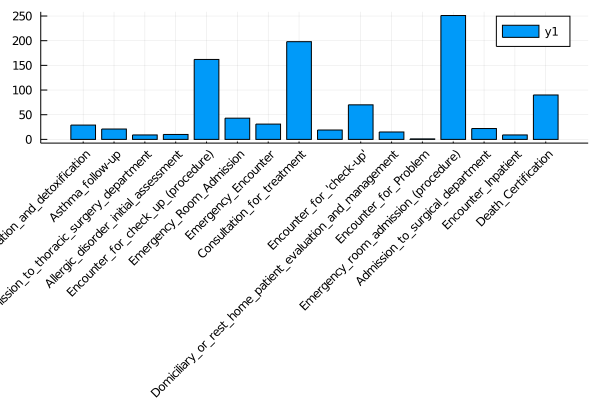

In [3]:
tEnc = CCD[:,StartsWith("Encounters.codeD,")]
aEnc = col2type(tEnc, ":")
rEnc, cEnc, vEnc = find(aEnc)
dEnc = countmap(vEnc)
bar(dEnc, xrotation=45)

In [4]:
display(size(getrow(CCD)))
display(size(CCD[:,StartsWith("Patient.birthTime:,")]))
display(size(CCD[:,StartsWith("effectiveTime:,")]))

B = CCD[:,StartsWith("Patient.birthTime,")]
rB, cB, vB = find(B)
display("B=" * string(size(B)) * cB[1])
E = CCD[:, StartsWith("effectiveTime:,")]
rE, cE, vE = find(E)
display("E=" * string(size(E)) * cE[1])

Brow = B[getrow(E),:]
rBrow, cBrow, vBrow = find(Brow)
display("Brow=" * string(size(Brow)) * " " * rBrow[1] * " " * cBrow[1] * " " * string(vBrow[1]))
display("Brow=" * string(size(Brow)) * " " * rBrow[2] * " " * cBrow[2] * " " * string(vBrow[2]))
Erow = E
rErow, cErow, vErow = find(Erow)
display("Erow=" * string(size(Erow))  * " " * rErow[1] * " " * cErow[1] * " " * cErow[1] * " " * string(vErow[1]))

BB = col2type(Brow, ":")
rBB, cBB, vBB = find(BB)
display("BB=" * string(size(BB)) * " " * rBB[1] * " " * cBB[1] * " " * vBB[1])
display("BB=" * string(size(BB)) * " " * rBB[2] * " " * cBB[2] * " " * vBB[2])

EE = col2type(Erow, ":")
rEE, cEE, vEE = find(EE)
display("EE=" * string(size(EE)) * " " * rEE[1] * " " * cEE[1] * " " * vEE[1])

rBirth, cBirth, vBirth = find(BB)
rEff,  cEff, vEff = find(EE)
display("vBirth=" * string(size(vBirth)) * " " * cBirth[1] * " " * vBirth[1])
display("veff=" * string(size(vEff)) * " " * cEff[1] * " " * vEff[1])


birthVals = Dates.DateTime.(vBirth, "yyyymmddHHMMSS")
effVals = Dates.DateTime.(vEff, "yyyymmddHHMMSS")
display("birthVals=" * string(size(birthVals)) * " " * string(birthVals[1]))
display("effVals=" * string(size(effVals)) * " " * string(effVals[1]))
vAges = Dates.year.(effVals) - Dates.year.(birthVals)

#DataFrame(e = effVals, b =  birthVals, eb = effVals - birthVals)
#convert((effVals[1] - birthVals[1]), Dates.year)
rBirth == rEff
#AgeB = Assoc(rBirth, cBirth, vAges)
#aa2df(AgeB
cAge = fill("age", length(vAges))
AgeE = Assoc(rEff, cAge, vAges)
aa2df(AgeE)




(981,)

(981, 843)

(842, 980)

"B=(981, 843)Patient.birthTime:19110124110630"

"E=(842, 980)effectiveTime:19430612154031"

"Brow=(842, 805) 2863bc39-0675-4d43-9994-5a78b5818e15 Patient.birthTime:19110124110630 1.0"

"Brow=(842, 805) 3c46e8b7-242b-495c-9d7f-9cb0319ee715 Patient.birthTime:19110124110630 1.0"

"Erow=(842, 980) 288c5c24-1518-4397-ab67-711c8eb19db7 effectiveTime:19430612154031 effectiveTime:19430612154031 1.0"

"BB=(842, 1) 0021bca5-354b-49a9-9aac-59061181b00f Patient.birthTime 19430512141253"

"BB=(842, 1) 0023732c-8b82-4d90-bda4-a085ff824ec6 Patient.birthTime 19640219214337"

"EE=(842, 1) 0021bca5-354b-49a9-9aac-59061181b00f effectiveTime 20201030234557"

"vBirth=(842,) Patient.birthTime 19430512141253"

"veff=(842,) effectiveTime 20201030234557"

"birthVals=(842,) 1943-05-12T14:12:53"

"effVals=(842,) 2020-10-30T23:45:57"

,,age
,Union…,Union…
1,0021bca5-354b-49a9-9aac-59061181b00f,77
2,0023732c-8b82-4d90-bda4-a085ff824ec6,56
3,002f4670-19c3-4ac9-9da6-833694acc87f,40
4,010eab55-0134-4055-ba07-0ec84223ec14,20
5,01753d6e-4d49-4446-a80d-ae939aa3862a,58
6,019bb61d-afbd-433f-92df-893b38228c28,32
7,01baef84-b5a7-48ef-aabc-01e1a31cbb5b,21
8,020dc3c1-ee6e-483b-8183-1a40091c4c9d,17
9,036e006c-24ac-4987-859a-0b8a353ee7e9,83


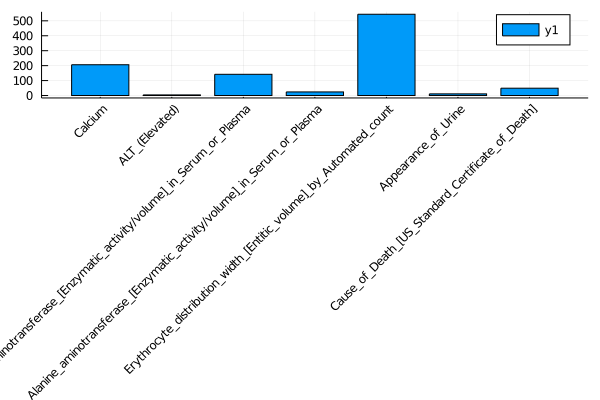

In [5]:
tDiag = CCD[:,StartsWith("Diagnostic_Results.Observation.codeD,")]
aDiag = col2type(tDiag, ":")
rDiag, cEnc, vEnc = find(aDiag)
dEnc = countmap(vEnc)
bar(dEnc, xrotation=45)

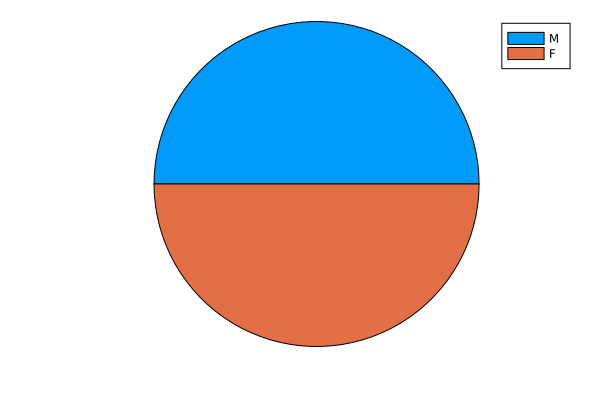

In [6]:
tGender = CCD[:,StartsWith("Patient.Admin,")]
aGender = col2type(tGender, ":")
rGender, cGender, vGender = find(aGender)
dGender = countmap(vGender)
pie(dGender, xrotation=45)

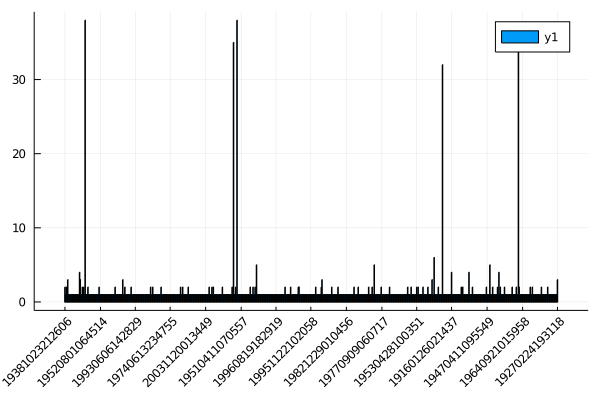

In [7]:
tBirth = CCD[:,StartsWith("Patient.birth,")]
aBirth  = col2type(tBirth , ":")
rBirth , cBirth , vBirth  = find(aBirth)
dBirth  = countmap(vBirth)
bar(dBirth, xrotation=45)

In [8]:
tBirth = CCD[:,StartsWith("Patient.birth,")]
tBirthRows = getrow(tBirth)
temp = CCD[tBirthRows,:]
tEffective = temp[:,StartsWith("effectiveTime,")]
display(size(tBirth))
display(size(tEffective))

(981, 843)

(842, 980)

In [9]:
tBirth = CCD[:,StartsWith("Patient.birth,")]
tBirthRows = getrow(tBirth)
temp = CCD[tBirthRows,:]
tEffective = temp[:,StartsWith("effectiveTime,")]
tEffectiveRows = getrow(tEffective)
tBirth = tBirth[tEffectiveRows,:]
display(size(tBirth))
display(size(tEffective))

(842, 805)

(842, 980)

In [10]:
aBirth = col2type(tBirth, ":")
aEffective = col2type(tEffective, ":")
display(size(aBirth))
display(size(aEffective))

(842, 1)

(842, 1)

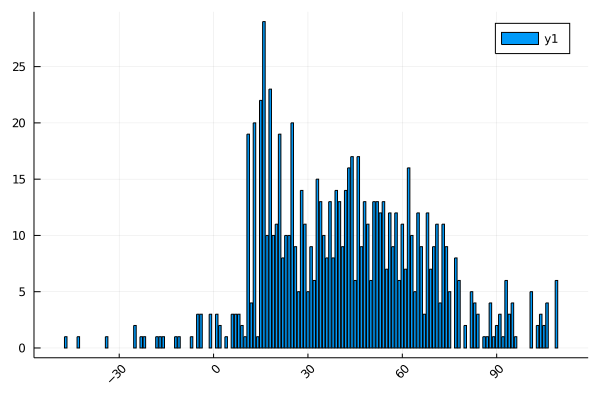

In [11]:
format="yyyymmddHHMMSS"

rBirth, cBirth, vBirth = find(aBirth)
rEffective, cEffective, vEffective = find(aEffective)
vBirth = Dates.DateTime.(vBirth, format)
vEffective = Dates.DateTime.(vEffective, format)
vAges = Dates.year.(vEffective) - Dates.year.(vBirth)
dAges  = countmap(vAges)
bar(dAges, xrotation=45)

### So how many are pediatric?

In [12]:
cAge = fill("Age", length(vAges))
A = Assoc(rBirth, cAge, vAges)
Agt0 = A > 0
Alt18 = Agt0 < 18
display(size(Alt18))
aa2df(Alt18)

(123, 1)

,,Age
,Union…,Union…
1,020dc3c1-ee6e-483b-8183-1a40091c4c9d,17
2,03880e56-1dfe-4737-b822-8b44efabdadf,17
3,04c192c7-8db2-447f-81bc-76bf51048804,15
4,058aa35b-31e2-41b5-86e0-a7b384005266,15
5,068a3755-3073-4bdd-aaf6-3966336b57e2,15
6,069299d1-acd5-4aa2-9e89-56804a85bdd3,15
7,07f49d1e-0901-4b55-8961-0ed1060a73d5,15
8,0ebe7fc8-f50a-412f-9dfe-d24add67b92c,15
9,0f4b6320-4974-4d48-9aba-4e36d6c86353,6


In [13]:
r18, c18, v18 = find(Alt18)
pos = ndigits(max(findmax(vAges)[1]))
AA = Assoc(r18, c18, lpad.(string.(v18), pos, "0"))
AA1 = val2col(AA, ":")
aa2df(AA1)

,,Age:001,Age:002,Age:004,Age:006,Age:007,Age:008,Age:009,Age:010,Age:011,Age:012,Age:013,Age:014,Age:015,Age:016,Age:017
,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…,Union…
1,020dc3c1-ee6e-483b-8183-1a40091c4c9d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,03880e56-1dfe-4737-b822-8b44efabdadf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,04c192c7-8db2-447f-81bc-76bf51048804,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,058aa35b-31e2-41b5-86e0-a7b384005266,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,068a3755-3073-4bdd-aaf6-3966336b57e2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,069299d1-acd5-4aa2-9e89-56804a85bdd3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,07f49d1e-0901-4b55-8961-0ed1060a73d5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0ebe7fc8-f50a-412f-9dfe-d24add67b92c,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0f4b6320-4974-4d48-9aba-4e36d6c86353,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
EFF = col2type(Teff, ":")
rEff, cEff, vEf = find(EFF)
println(size(vEf))
effVals = Dates.DateTime.(string.(vEff), "yyyymmddHHMMSS")
truncEff = []
for i in eachindex(effVals) 
    push!(truncEff, Dates.format(round(Dates.DateTime(effVals[i]), Dates.Day), "yyyymmdd"))
end
EFF1 = Assoc(rEff, cEff, truncEff)
EFF2 = val2col(EFF1, ":")
aa2df(EFF2)
size(rEff)

LoadError: UndefVarError: Teff not defined

In [15]:
eff = CCDD[:,StartsWith("effectiveTime,")]
#eff = CCDD[:,StartsWith("dragounters.effectiveTime.low,")]
println(size(eff))
aa2df(eff)

LoadError: UndefVarError: CCDD not defined

In [16]:
BIRTH = col2type(birth, ":")
birthVals = Dates.DateTime.(string.(getval(BIRTH)), "yyyymmddHHMMSS")
println(size(getval(BIRTH)))
println(size(birthVals))

LoadError: UndefVarError: birth not defined

In [17]:
EFF = col2type(eff, ":")
effVals = Dates.DateTime.(string.(getval(EFF)), "yyyymmddHHMMSS")
println(size(getval(EFF)))
println(size(effVals))

LoadError: UndefVarError: eff not defined

In [18]:
println(size(BIRTH))
println(size(EFF))

LoadError: UndefVarError: BIRTH not defined

In [19]:
D4M.sortedintersect(getrow(EFF), getrow(BIRTH))

LoadError: UndefVarError: EFF not defined

In [20]:
display(HTML("<h1>xxx</h1>"))

HTML{String}("<h1>xxx</h1>")